## Feature Selection for Classification using univariate statistics
* Use Anova and chi2 to select relevant features for building a classification model

In [53]:
import pandas as pd
import numpy as np
import pylab
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [54]:
diabetes_df = pd.read_csv('datasets/diabetes.csv')

In [55]:
diabetes_df.head()

,Pregnancies,Glucose,BP,Skin Thickness,Insulin,Mass,Pedigree,Age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [56]:
X = diabetes_df.drop('class', axis = 1)

y = diabetes_df['class']

In [57]:
X.shape

(768, 8)

In [58]:
X = X.astype(np.float64)

In [59]:
from sklearn.feature_selection import chi2, SelectKBest

select_features = SelectKBest(chi2, k=3)

X_new = select_features.fit_transform(X, y)

In [60]:
X_new.shape

(768, 3)

In [61]:
X_new = X_new.astype(np.float64)

In [62]:
X_new = pd.DataFrame(X_new)

X_new.head()

,0,1,2
0,148.0,0.0,50.0
1,85.0,0.0,31.0
2,183.0,0.0,32.0
3,89.0,94.0,21.0
4,137.0,168.0,33.0


In [63]:
selected_features = []

for i in range(len(X_new.columns)):
    for j in range(len(X.columns)):
        
        if(X_new.iloc[:,i].equals(X.iloc[:,j])):
            selected_features.append(X.columns[j])
            
selected_features

['Glucose', 'Insulin', 'Age']

In [64]:
rejected_features = set(list(X)) - set(selected_features)

rejected_features

{'BP', 'Mass', 'Pedigree', 'Pregnancies', 'Skin Thickness'}

In [65]:
FEATURES = list(diabetes_df.columns[:-1])

FEATURES

['Pregnancies',
 'Glucose',
 'BP',
 'Skin Thickness',
 'Insulin',
 'Mass',
 'Pedigree',
 'Age']

In [71]:
def build_model(target, 
                features, 
                dataset,
                preprocess_fn,
                *hyperparameters):
    
    X = dataset[features]
    Y = dataset[target]

    X = preprocess_fn(X, Y, *hyperparameters)
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    
    model = logistic_fn(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    return {'accuracy': acc, 
            'precision' : prec,
            'recall' : recall}    

In [72]:
def compare_results(result_dict):
    
    for key in result_dict:
        print('Test: ', key)

        print()
        print("accuracy_score : ", result_dict[key]['accuracy'])
        print("precision_score : ", result_dict[key]['precision'])
        print("recall_score : ", result_dict[key]['recall'])
        print()

In [73]:
def visualize_results_kbest(result_dict):
    
    n_components = list(range(0, 8))
    acc = [result_dict[key]['accuracy'] for key in result_dict]

    plt.figure(figsize = (12, 10))
    plt.plot(n_components, acc)

    pylab.ylim([0,1])

    plt.xlabel('n components')
    plt.ylabel('accuracy');

In [74]:
def logistic_fn(x_train, y_train):
    
    model = LogisticRegression(solver = 'liblinear')
    model.fit(x_train, y_train)
    
    return model

## Feature Selection : CHI2
 * Chi2 - Chi-squared stats of non-negative features for classification tasks
 * SelectKBest removes all but the k highest scoring features
 
 https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html

In [75]:
from sklearn.feature_selection import chi2, SelectKBest

def apply_chi2(x, y, k):
    
    select_features = SelectKBest(chi2, k = k)
    x_new = select_features.fit_transform(x, y)
        
    return pd.DataFrame(x_new)

In [76]:
result_dict = {}
    
for i in range (1, 9):
    result_dict['chi2 - ' + str(i)] = build_model('class',
                                                   FEATURES,
                                                   diabetes_df,
                                                   apply_chi2,
                                                   i)

In [77]:
compare_results(result_dict)

Test:  chi2 - 1

accuracy_score :  0.6623376623376623
precision_score :  0.6666666666666666
recall_score :  0.07407407407407407

Test:  chi2 - 2

accuracy_score :  0.7402597402597403
precision_score :  0.6842105263157895
recall_score :  0.48148148148148145

Test:  chi2 - 3

accuracy_score :  0.7467532467532467
precision_score :  0.7419354838709677
recall_score :  0.42592592592592593

Test:  chi2 - 4

accuracy_score :  0.7857142857142857
precision_score :  0.696969696969697
recall_score :  0.5

Test:  chi2 - 5

accuracy_score :  0.7337662337662337
precision_score :  0.7045454545454546
recall_score :  0.5254237288135594

Test:  chi2 - 6

accuracy_score :  0.7727272727272727
precision_score :  0.775
recall_score :  0.543859649122807

Test:  chi2 - 7

accuracy_score :  0.7922077922077922
precision_score :  0.6981132075471698
recall_score :  0.6981132075471698

Test:  chi2 - 8

accuracy_score :  0.8051948051948052
precision_score :  0.7954545454545454
recall_score :  0.625



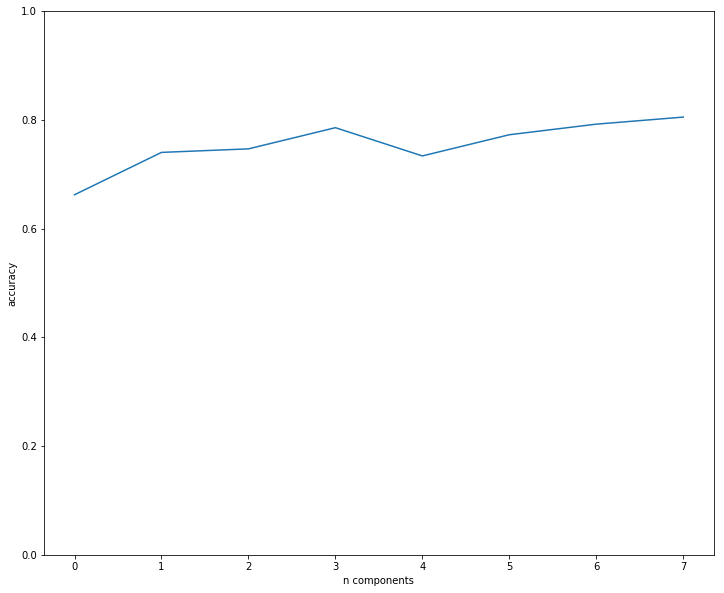

In [78]:
visualize_results_kbest(result_dict)

## Feature Selection : f_classif

 * f_classif - ANOVA F-value between label/feature for classification tasks.
 * SelectKBest removes all but the k highest scoring features
 
 https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif

In [79]:
from sklearn.feature_selection import f_classif

def apply_f_classif(x, y, k):
    
    select_features = SelectKBest(f_classif, k = k)
    x_new = select_features.fit_transform(x, y)
        
    return pd.DataFrame(x_new)

In [80]:
result_dict = {}
    
for i in range (1, 9):
    result_dict['f_classif - ' + str(i)] = build_model('class',
                                                       FEATURES,
                                                       diabetes_df,
                                                       apply_f_classif,
                                                       i)

In [81]:
compare_results(result_dict)

Test:  f_classif - 1

accuracy_score :  0.7272727272727273
precision_score :  0.7222222222222222
recall_score :  0.4482758620689655

Test:  f_classif - 2

accuracy_score :  0.7532467532467533
precision_score :  0.7647058823529411
recall_score :  0.4642857142857143

Test:  f_classif - 3

accuracy_score :  0.7727272727272727
precision_score :  0.6842105263157895
recall_score :  0.5306122448979592

Test:  f_classif - 4

accuracy_score :  0.7727272727272727
precision_score :  0.6808510638297872
recall_score :  0.6153846153846154

Test:  f_classif - 5

accuracy_score :  0.7792207792207793
precision_score :  0.7575757575757576
recall_score :  0.49019607843137253

Test:  f_classif - 6

accuracy_score :  0.7142857142857143
precision_score :  0.7297297297297297
recall_score :  0.4426229508196721

Test:  f_classif - 7

accuracy_score :  0.7922077922077922
precision_score :  0.775
recall_score :  0.5740740740740741

Test:  f_classif - 8

accuracy_score :  0.7922077922077922
precision_score :  0.7

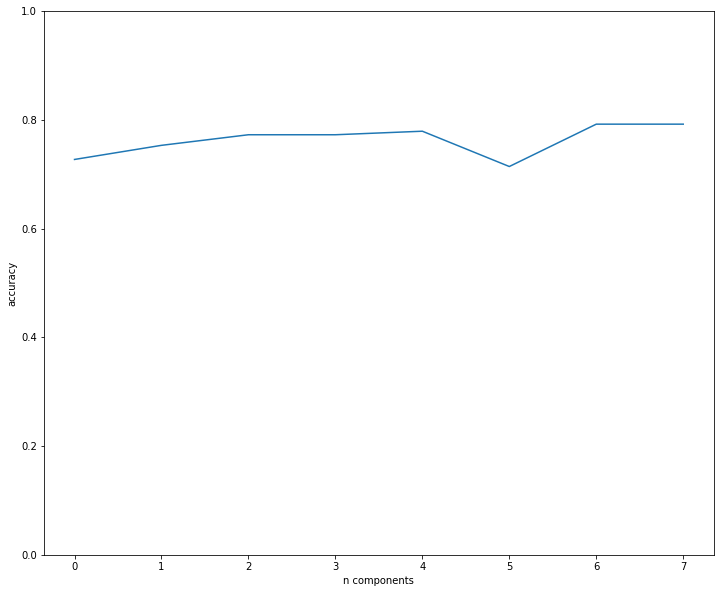

In [82]:
visualize_results_kbest(result_dict)

## Feature Selection : mutual_info_classif

 * mutual_info_classif - Estimate mutual information for a discrete target variable.
 * SelectPercentile removes all but a user-specified highest scoring percentage of features
 
 https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html
 https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html

In [83]:
from sklearn.feature_selection import mutual_info_classif, SelectPercentile

def apply_mutual_info_classif(x, y, percentile):
    
    select_features = SelectPercentile(mutual_info_classif, percentile = percentile)
    x_new = select_features.fit_transform(x, y)
        
    return pd.DataFrame(x_new)

In [84]:
def visualize_results_percentile(result_dict):
    
    n_components = list(range(1, 100, 10))
    acc = [result_dict[key]['accuracy'] for key in result_dict]

    plt.figure(figsize = (12, 10))
    plt.plot(n_components, acc)

    pylab.ylim([0,1])

    plt.xlabel('percentile')
    plt.ylabel('accuracy');

In [85]:
result_dict = {}
    
for i in range(1, 100, 10):
    result_dict['mutual_info_classif percentile - ' + str(i)] = build_model('class',
                                                   FEATURES,
                                                   diabetes_df,
                                                   apply_mutual_info_classif,
                                                   i)

In [86]:
compare_results(result_dict)

Test:  mutual_info_classif percentile - 1

accuracy_score :  0.7662337662337663
precision_score :  0.7714285714285715
recall_score :  0.4909090909090909

Test:  mutual_info_classif percentile - 11

accuracy_score :  0.7727272727272727
precision_score :  0.8064516129032258
recall_score :  0.46296296296296297

Test:  mutual_info_classif percentile - 21

accuracy_score :  0.7792207792207793
precision_score :  0.75
recall_score :  0.48

Test:  mutual_info_classif percentile - 31

accuracy_score :  0.7597402597402597
precision_score :  0.7666666666666667
recall_score :  0.4339622641509434

Test:  mutual_info_classif percentile - 41

accuracy_score :  0.7402597402597403
precision_score :  0.8181818181818182
recall_score :  0.4426229508196721

Test:  mutual_info_classif percentile - 51

accuracy_score :  0.7597402597402597
precision_score :  0.7916666666666666
recall_score :  0.5846153846153846

Test:  mutual_info_classif percentile - 61

accuracy_score :  0.7922077922077922
precision_score :

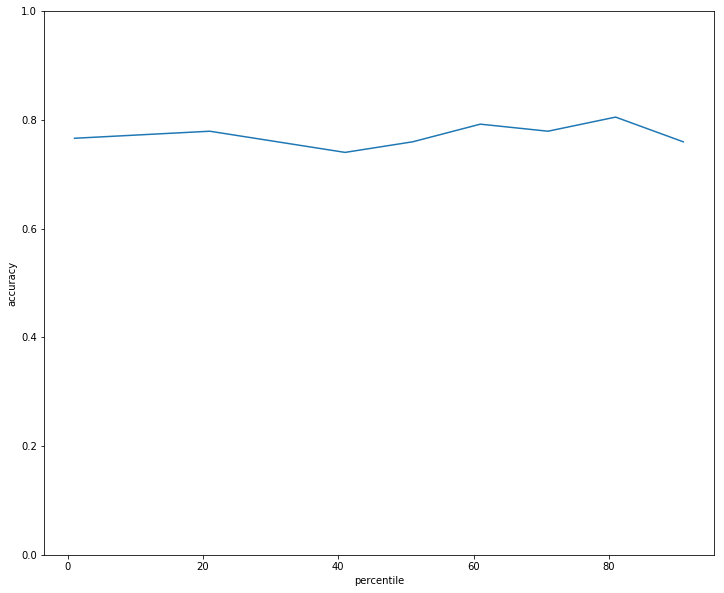

In [87]:
visualize_results_percentile(result_dict)